In [1]:
import pandas as pd
import numpy as np 
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
data1=pd.read_csv("C:/Users/ritvi/Downloads/HPCL/FINAL DATA/fulldata_1.csv")
data2=pd.read_csv("C:/Users/ritvi/Downloads/HPCL/FINAL DATA/fulldata_2.csv")
data3=pd.read_csv("C:/Users/ritvi/Downloads/HPCL/FINAL DATA/fulldata_3.csv")
data4=pd.read_csv("C:/Users/ritvi/Downloads/HPCL/FINAL DATA/fulldata_4.csv")
data5=pd.read_csv("C:/Users/ritvi/Downloads/HPCL/FINAL DATA/fulldata_5.csv")
data6=pd.read_csv("C:/Users/ritvi/Downloads/HPCL/FINAL DATA/fulldata_6.csv")

In [3]:
data1234 = pd.concat([data1, data2, data3, data4], axis=0,ignore_index=True)

In [4]:
data123456 = pd.concat([data1234, data5, data6], axis=0,ignore_index=True)

In [5]:
columns_to_drop = ['multiplication_factor', 'systemopeninggoodstock', 'systemclosinggoodstock','itemcategory','sales_area','ro_code','location_code','ro_name','sales_area_name','pricecode','jdedistributorcode','itemdescription']
data = data123456.drop(columns=columns_to_drop, axis=1)
data

,dayenddate,dom_nondem,isempty,totalsale,zone_name
0,08-04-2022,D,Y,0,North West LPG Zone
1,08-04-2022,D,Y,0,North West LPG Zone
2,08-04-2022,D,Y,0,North West LPG Zone
3,08-04-2022,D,Y,0,North West LPG Zone
4,08-04-2022,D,Y,0,North West LPG Zone
...,...,...,...,...,...
6035305,11-04-2023,N,N,0,North West LPG Zone
6035306,12-04-2023,N,N,0,North West LPG Zone
6035307,13-04-2023,N,N,0,North West LPG Zone
6035308,14-04-2023,N,N,0,North West LPG Zone


In [6]:
dataeast=data[data['zone_name']=='North West LPG Zone']

In [7]:
Data_NONDEM=dataeast[dataeast['dom_nondem']=='N']
Data_DOM=dataeast[dataeast['dom_nondem']=='D']

In [8]:
Data_DOM.drop(columns='dom_nondem',axis=1)
Data_DOM = Data_DOM.reset_index(drop=True)
Data_DOM

,dayenddate,dom_nondem,isempty,totalsale,zone_name
0,08-04-2022,D,Y,0,East
1,08-04-2022,D,Y,0,East
2,08-04-2022,D,Y,0,East
3,08-04-2022,D,Y,0,East
4,08-04-2022,D,Y,0,East
...,...,...,...,...,...
445427,21-06-2023,D,N,1,East
445428,23-06-2023,D,N,0,East
445429,24-06-2023,D,N,0,East
445430,25-06-2023,D,N,0,East


In [9]:
Data_DOM.head()

,dayenddate,dom_nondem,isempty,totalsale,zone_name
0,08-04-2022,D,Y,0,East
1,08-04-2022,D,Y,0,East
2,08-04-2022,D,Y,0,East
3,08-04-2022,D,Y,0,East
4,08-04-2022,D,Y,0,East


In [10]:
date_column=Data_NONDEM['dayenddate']
date_column

6156       08-04-2022
13335      15-01-2023
20531      16-01-2023
27733      17-01-2023
34944      18-01-2023
              ...    
6035100    21-06-2023
6035101    23-06-2023
6035102    24-06-2023
6035103    25-06-2023
6035104    26-06-2023
Name: dayenddate, Length: 576832, dtype: object

In [11]:
pattern = r'\d{2}-\d{2}-\d{4}'
inconsistent_dates = []
for date in date_column:
    if not re.match(pattern, str(date)):
        inconsistent_dates.append(date)

In [12]:
if inconsistent_dates:
    print("Inconsistent dates found:")
    for date in inconsistent_dates:
        print(date)
else:
    print("Date format is consistent in the dataset.")

Date format is consistent in the dataset.


In [13]:
df=Data_DOM


In [14]:
df['dayenddate'] = pd.to_datetime(df['dayenddate'], format='%d-%m-%Y').dt.strftime('%m-%d-%Y')

In [15]:
df

,dayenddate,dom_nondem,isempty,totalsale,zone_name
0,04-08-2022,D,Y,0,East
1,04-08-2022,D,Y,0,East
2,04-08-2022,D,Y,0,East
3,04-08-2022,D,Y,0,East
4,04-08-2022,D,Y,0,East
...,...,...,...,...,...
445427,06-21-2023,D,N,1,East
445428,06-23-2023,D,N,0,East
445429,06-24-2023,D,N,0,East
445430,06-25-2023,D,N,0,East


In [16]:
grouped_df = df.groupby('dayenddate',as_index=False)

In [17]:
grouped_sum = grouped_df['totalsale'].sum()

In [18]:
df=grouped_sum
df

,dayenddate,totalsale
0,01-15-2023,94027
1,01-16-2023,157028
2,01-17-2023,197010
3,01-18-2023,203108
4,01-19-2023,199335
...,...,...
134,06-21-2023,165315
135,06-23-2023,182401
136,06-24-2023,178458
137,06-25-2023,113079


<AxesSubplot:>

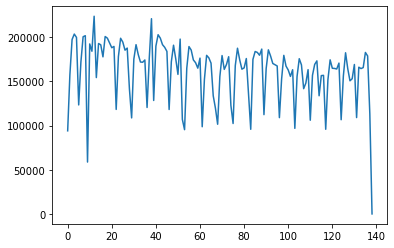

In [19]:
df['totalsale'].plot()

In [20]:
df.drop([138],inplace=True)

In [21]:
df=df.reset_index(drop=True)

In [22]:
df = df.drop(df[df['dayenddate'] == '04-08-2022'].index)

In [23]:
##CHECK FOR MISSING DATA##

from datetime import timedelta
df['dayenddate'] = pd.to_datetime(df['dayenddate'], format='%m-%d-%Y')
df.set_index('dayenddate', inplace=True)


In [24]:
min_date = df.index.min()
max_date = df.index.max()
complete_dates = pd.date_range(start=min_date, end=max_date)


In [25]:
missing_dates = set(complete_dates) - set(df.index)

In [26]:
print("Missing dates:")
for date in missing_dates:
    print(date.strftime('%m/%d/%Y'))

Missing dates:
03/03/2023
03/13/2023
03/16/2023
01/28/2023
03/10/2023
02/05/2023
03/05/2023
03/19/2023
03/14/2023
03/08/2023
01/29/2023
03/11/2023
03/07/2023
03/04/2023
03/18/2023
01/20/2023
03/02/2023
06/22/2023
02/04/2023
03/17/2023
03/09/2023
01/21/2023
03/06/2023
03/15/2023
03/12/2023


<AxesSubplot:xlabel='dayenddate'>

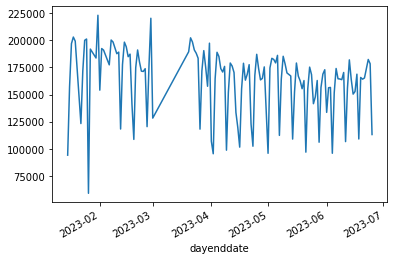

In [27]:
df['totalsale'].plot()

In [28]:
##APPENDING MISSING VALUES##

min_date = df.index.min()
max_date = df.index.max()
complete_dates = pd.date_range(start=min_date, end=max_date)

In [29]:
df = df.reindex(complete_dates)

In [30]:
df.index.name = 'date'


In [31]:
df.isnull().sum()

totalsale    25
dtype: int64

In [32]:
df = df.fillna(df.shift(7))

In [33]:
df

,totalsale
date,
2023-01-15,94027.0
2023-01-16,157028.0
2023-01-17,197010.0
2023-01-18,203108.0
2023-01-19,199335.0
...,...
2023-06-21,165315.0
2023-06-22,150411.0
2023-06-23,182401.0


In [34]:
df = df.fillna(df.shift(7))
df.isnull().sum()

totalsale    8
dtype: int64

In [35]:
df = df.fillna(df.shift(7))
df.isnull().sum()

totalsale    4
dtype: int64

In [36]:
df = df.fillna(df.shift(-7))
df.isnull().sum()

totalsale    2
dtype: int64

<AxesSubplot:xlabel='date'>

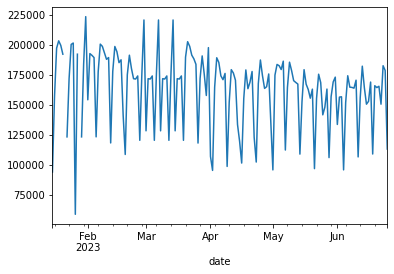

In [37]:
df['totalsale'].plot()

In [38]:
df = df.fillna(df.shift(-7))
df.isnull().sum()

totalsale    1
dtype: int64

In [39]:
df = df.fillna(df.shift(-7))
df.isnull().sum()

totalsale    0
dtype: int64

<AxesSubplot:xlabel='date'>

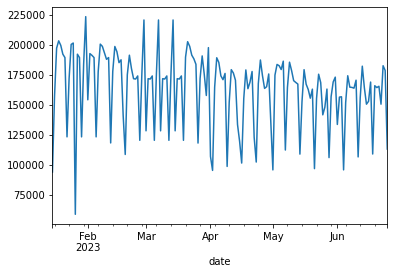

In [40]:
df['totalsale'].plot()

In [41]:
df.to_csv('east_domestic1.csv')